In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train=pd.read_excel('Flight_Data_Train.xlsx')
data_test=pd.read_excel('Flight_Test_set.xlsx')

In [3]:
data=pd.concat([data_train, data_test], ignore_index=True)
data

,Additional_Info,Airline,Arrival_Time,Dataset,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,Train,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,Train,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,Train,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,Train,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,Train,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,20:25 07 Jun,Test,6/06/2019,20:30,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop
13350,No info,IndiGo,16:55,Test,27/03/2019,14:20,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop
13351,No info,Jet Airways,04:25 07 Mar,Test,6/03/2019,21:50,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop
13352,No info,Air India,19:15,Test,6/03/2019,04:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop


In [4]:
data.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Dataset             object
Date_of_Journey     object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
dtype: object

In [5]:
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])

In [6]:
data.dtypes

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Dataset                    object
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                   object
Price                     float64
Route                      object
Source                     object
Total_Stops                object
dtype: object

In [7]:
d=(data["Arrival_Time"]-data["Dep_Time"])
duration=list()
for i in range(len(d)):
    dur=d.iloc[i].seconds/3600
    duration.append(dur)
data["Duration"]=duration

In [8]:
data

,Additional_Info,Airline,Arrival_Time,Dataset,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,2020-03-22 01:10:00,Train,2019-03-24,2020-04-01 22:20:00,New Delhi,2.833333,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,2020-04-01 13:15:00,Train,2019-01-05,2020-04-01 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,2020-06-10 04:25:00,Train,2019-09-06,2020-04-01 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,2020-04-01 23:30:00,Train,2019-12-05,2020-04-01 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,2020-04-01 21:35:00,Train,2019-01-03,2020-04-01 16:50:00,New Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1 stop
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2020-06-07 20:25:00,Test,2019-06-06,2020-04-01 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1 stop
13350,No info,IndiGo,2020-04-01 16:55:00,Test,2019-03-27,2020-04-01 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,non-stop
13351,No info,Jet Airways,2020-03-07 04:25:00,Test,2019-06-03,2020-04-01 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1 stop
13352,No info,Air India,2020-04-01 19:15:00,Test,2019-06-03,2020-04-01 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1 stop


In [9]:
data.drop(columns=["Arrival_Time"],inplace=True)

In [10]:
data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [11]:
data['Airline'].value_counts()                

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [12]:
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
data['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [14]:
data['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → CCU → HYD                   1
BOM → JDH → JAI → DEL → HYD       1
CCU → IXZ → MAA → BLR             1
BOM → BBI → HYD                   1
BLR → HBX → BOM → NAG → DEL       1
Name: Route, Length: 132, dtype: int64

In [15]:
data['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [16]:
data['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [17]:
# There are few entries in the dataset which have duplicate names
data['Additional_Info'].replace('1 Long layover','Long layover',inplace=True)
data['Additional_Info'].replace('2 Long layover','Long layover',inplace=True)
data['Additional_Info'].replace('No info','No Info',inplace=True)
data['Airline'].replace('Jet Airways Business','Jet Airways',inplace=True)
data['Airline'].replace('Multiple carriers Premium economy','Multiple carriers',inplace=True)
data['Airline'].replace('Vistara Premium economy','Vistara',inplace=True)
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [18]:
# Departure time can be categorized into four bins depending on the time of the day
data['time_of_day'] = pd.to_datetime(data.Dep_Time, format='%H:%M')
a = data.assign(dept_time=pd.cut(data.time_of_day.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
data['Departure'] = a['dept_time']

In [19]:
data

,Additional_Info,Airline,Dataset,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,time_of_day,Departure
0,No Info,IndiGo,Train,2019-03-24,2020-04-01 22:20:00,Delhi,2.833333,3897.0,BLR → DEL,Banglore,non-stop,2020-04-01 22:20:00,Evening
1,No Info,Air India,Train,2019-01-05,2020-04-01 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,2020-04-01 05:50:00,Night
2,No Info,Jet Airways,Train,2019-09-06,2020-04-01 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,2020-04-01 09:25:00,Morning
3,No Info,IndiGo,Train,2019-12-05,2020-04-01 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1 stop,2020-04-01 18:05:00,Afternoon
4,No Info,IndiGo,Train,2019-01-03,2020-04-01 16:50:00,Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1 stop,2020-04-01 16:50:00,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No Info,Air India,Test,2019-06-06,2020-04-01 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1 stop,2020-04-01 20:30:00,Evening
13350,No Info,IndiGo,Test,2019-03-27,2020-04-01 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,non-stop,2020-04-01 14:20:00,Afternoon
13351,No Info,Jet Airways,Test,2019-06-03,2020-04-01 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1 stop,2020-04-01 21:50:00,Evening
13352,No Info,Air India,Test,2019-06-03,2020-04-01 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1 stop,2020-04-01 04:00:00,Night


In [20]:
data.drop(columns=['Date_of_Journey','Route', 'time_of_day', 'Dep_Time'],inplace=True)

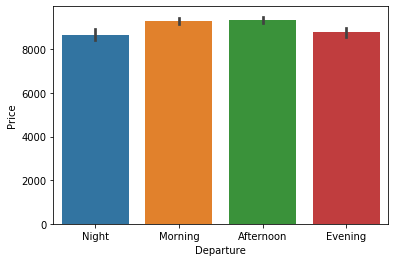

In [21]:
# Analyzing ticket price based on the departure time of the day
sns.barplot(x='Departure',y='Price',data=data)
plt.show()

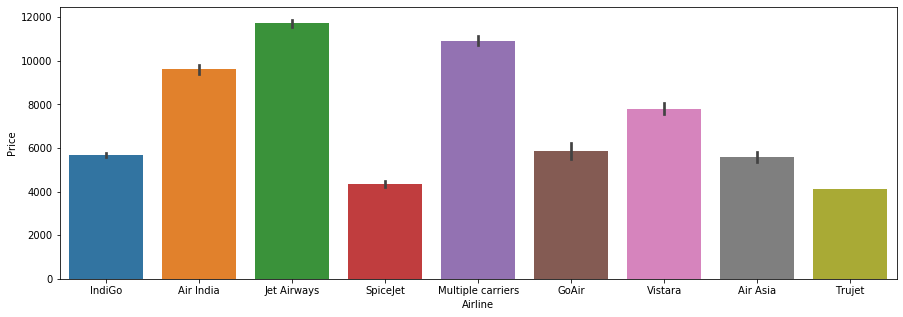

In [22]:
# Analyzing the ticket price by airline
# Most expensive airline is jet airways
plt.figure(figsize=(15,5))
sns.barplot(x='Airline',y='Price',data=data)
plt.show()

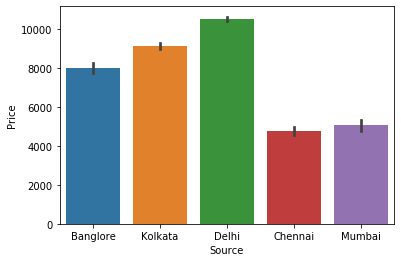

In [23]:
# Analyzing the ticket price based on the source destination
# Ticket prices are most expensive from Delhi
sns.barplot(x='Source',y='Price',data=data)
plt.show()

In [24]:
# Analyzing the correlation between the price and duration
# A positive correlation exists between price and duration
data.corr()

,Duration,Price
Duration,1.000000,0.450205
Price,0.450205,1.000000


In [25]:
data.describe()

,Duration,Price
count,13354.000000,10683.000000
mean,8.227042,9087.064121
std,6.376052,4611.359167
min,0.000000,1759.000000
25%,2.750000,5277.000000
50%,6.416667,8372.000000
75%,12.583333,12373.000000
max,23.916667,79512.000000


In [26]:
# There are categorical variable in the dataset. These must be converted into integers for further processing
data=pd.get_dummies(data, columns=["Additional_Info","Airline","Destination","Source","Total_Stops", "Departure"], drop_first=True)
data

,Dataset,Duration,Price,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Departure_Morning,Departure_Afternoon,Departure_Evening
0,Train,2.833333,3897.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,Train,7.416667,7662.0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,Train,19.000000,13882.0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,Train,5.416667,6218.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,Train,4.750000,13302.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Test,23.916667,NaN,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
13350,Test,2.583333,NaN,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
13351,Test,6.583333,NaN,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
13352,Test,15.250000,NaN,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
data_train=data.loc[data["Dataset"]=="Train"]
data_test=data.loc[data["Dataset"]=="Test"]

In [28]:
data_train

,Dataset,Duration,Price,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Departure_Morning,Departure_Afternoon,Departure_Evening
0,Train,2.833333,3897.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,Train,7.416667,7662.0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,Train,19.000000,13882.0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,Train,5.416667,6218.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,Train,4.750000,13302.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Train,2.500000,4107.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
10679,Train,2.583333,4145.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
10680,Train,3.000000,7229.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
10681,Train,2.666667,12648.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [29]:
data_test

,Dataset,Duration,Price,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Departure_Morning,Departure_Afternoon,Departure_Evening
10683,Test,10.916667,NaN,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10684,Test,4.000000,NaN,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
10685,Test,23.750000,NaN,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10686,Test,13.000000,NaN,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
10687,Test,2.833333,NaN,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Test,23.916667,NaN,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
13350,Test,2.583333,NaN,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
13351,Test,6.583333,NaN,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
13352,Test,15.250000,NaN,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
data_train.drop(columns=['Dataset'], inplace = True)
data_test.drop(columns=['Dataset', 'Price'], inplace = True)

In [32]:
x=data_train.drop(columns=['Price'])
y=data_train['Price']

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a,columns=x.columns)
x

,Duration,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Airline_Air India,Airline_GoAir,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Departure_Morning,Departure_Afternoon,Departure_Evening
0,-0.841307,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,-0.442912,-0.135998,...,-0.859188,-0.606227,-0.264193,-0.407289,-0.065039,-0.009676,1.435324,-0.739083,-0.606083,1.931626
1,-0.123703,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,2.257787,-0.135998,...,-0.859188,1.649546,-0.264193,2.455258,-0.065039,-0.009676,-0.696707,-0.739083,-0.606083,-0.517699
2,1.689880,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,-0.442912,-0.135998,...,1.163890,-0.606227,-0.264193,2.455258,-0.065039,-0.009676,-0.696707,1.353028,-0.606083,-0.517699
3,-0.436839,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,-0.442912,-0.135998,...,-0.859188,1.649546,-0.264193,-0.407289,-0.065039,-0.009676,-0.696707,-0.739083,1.649939,-0.517699
4,-0.541218,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,-0.442912,-0.135998,...,-0.859188,-0.606227,-0.264193,-0.407289,-0.065039,-0.009676,-0.696707,-0.739083,1.649939,-0.517699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-0.893497,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,-0.442912,-0.135998,...,-0.859188,1.649546,-0.264193,-0.407289,-0.065039,-0.009676,1.435324,-0.739083,-0.606083,1.931626
10679,-0.880449,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,2.257787,-0.135998,...,-0.859188,1.649546,-0.264193,-0.407289,-0.065039,-0.009676,1.435324,-0.739083,-0.606083,1.931626
10680,-0.815213,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,-0.442912,-0.135998,...,-0.859188,-0.606227,-0.264193,-0.407289,-0.065039,-0.009676,1.435324,1.353028,-0.606083,-0.517699
10681,-0.867402,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676,-0.442912,-0.135998,...,-0.859188,-0.606227,-0.264193,-0.407289,-0.065039,-0.009676,1.435324,1.353028,-0.606083,-0.517699


In [34]:
from sklearn.metrics import r2_score
def maxr2score(cm,x,y):
    maxr2=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.2)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        rsc=r2_score(y_test,y_pred)
        if rsc>maxr2:
            maxr2=rsc
            rs=r_state
    print("Maximum r2_score is at random state :",rs," and it is :",maxr2)

In [35]:
# Using Linear regression model
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=.20)
lr=LinearRegression()
lr.fit(x_train,y_train)
predicty=lr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predicty))
print('The root mean square error for linear regression model is :', np.sqrt(mean_squared_error(y_test, predicty)))

The mean absolute error for linear regression model is : 1876.0276670644719
The mean square error for linear regression model is : 8223077.272745036
The root mean square error for linear regression model is : 2867.590848211271


In [36]:
# Using Ridge regression
from sklearn.linear_model import Ridge
rr=Ridge()
hyperparametersrr={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridrr = GridSearchCV(rr, hyperparametersrr, cv=10)
gridrr.fit(x,y)
gridrr.best_params_

{'alpha': 1}

In [37]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1)
maxr2score(rr,x,y)

Maximum r2_score is at random state : 131  and it is : 0.6920396379022571


In [38]:
print("Mean r2 score for Ridge regression after cross validation: ", cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Ridge regression from mean r2 score is : ", cross_val_score(rr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge regression after cross validation:  0.637775070244149
Standard deviation for Ridge regression from mean r2 score is :  0.025063476189205822


In [39]:
# Using Lasso regression
from sklearn.linear_model import Lasso
lar=Lasso()
hyperparameterlar={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridlar = GridSearchCV(lar, hyperparameterlar, cv=5)
gridlar.fit(x,y)
gridlar.best_params_

{'alpha': 0.0001}

In [40]:
from sklearn.linear_model import Lasso
lar=Lasso(alpha=0.0001)
maxr2score(lar,x,y)

Maximum r2_score is at random state : 131  and it is : 0.692024094170026


In [41]:
print("Mean r2 score for Lasso regression after cross validation: ", cross_val_score(lar,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Lasso regression from mean r2 score is : ", cross_val_score(lar,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso regression after cross validation:  0.6380271632921166
Standard deviation for Lasso regression from mean r2 score is :  0.02472283253633557


In [42]:
# Using KNN regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
hyperparameter={"n_neighbors":range(1,12)}
gridknr = GridSearchCV(knr, hyperparameter, cv=5, n_jobs=-1)
gridknr.fit(x,y)
gridknr.best_params_

{'n_neighbors': 5}

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
maxr2score(knr,x,y)

Maximum r2_score is at random state : 135  and it is : 0.7563769333442443


In [44]:
print("Mean r2 score for KNeighborsRegressor after cross validation: ", cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNeighborsRegressor from mean r2 score is : ", cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNeighborsRegressor after cross validation:  0.714407884915676
Standard deviation for KNeighborsRegressor from mean r2 score is :  0.008457769489337552


In [45]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
hyperparametersdtr={'criterion':['mse','mae'],'max_depth':range(1,2)}
griddtr=GridSearchCV(dtr, hyperparametersdtr, cv=5, scoring='r2', n_jobs=-1)
griddtr.fit(x,y)
print(griddtr.best_params_)

{'criterion': 'mse', 'max_depth': 1}


In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=1)
maxr2score(dtr,x,y)

Maximum r2_score is at random state : 77  and it is : 0.4357015203802296


In [47]:
print("Mean r2 score for Decision Tree Regressor after cross validation: ", cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Decision Tree Regressor from mean r2 score is : ", cross_val_score(dtr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Decision Tree Regressor after cross validation:  0.37630570174936795
Standard deviation for Decision Tree Regressor from mean r2 score is :  0.009900408272485733


In [50]:
# Among all the models, KNN Regressor is the best performing model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 135,test_size=0.20)
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
predictknry=knr.predict(x_test)
print('The mean absolute error for KNeighborsRegressor model is :', mean_absolute_error(y_test, predictknry))
print('The mean square error for KNeighborsRegressor model is :', mean_squared_error(y_test, predictknry))
print('The root mean square error for KNeighborsRegressor model is :', np.sqrt(mean_squared_error(y_test, predictknry)))
print("The r2_score for KNeighborsRegressor is: ",r2_score(y_test,predictknry))

The mean absolute error for KNeighborsRegressor model is : 1333.5974730931212
The mean square error for KNeighborsRegressor model is : 5085588.343303696
The root mean square error for KNeighborsRegressor model is : 2255.124906364101
The r2_score for KNeighborsRegressor is:  0.7563769333442443


In [51]:
x_test=data_test

In [53]:
price_pred=knr.predict(x_test)

In [56]:
# Price_pred dataframe
price_prediction=pd.DataFrame(price_pred,columns=["Price"])

In [57]:
price_prediction.to_csv("Flight_Price_Predictions.csv",index=False)